In [231]:
%reset -f
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib notebook
plt.close('all')

ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) # legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize':titlesize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
mpl.rcParams.update({'image.cmap':'rainbow'})

mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

/home/sfuruset/miniconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


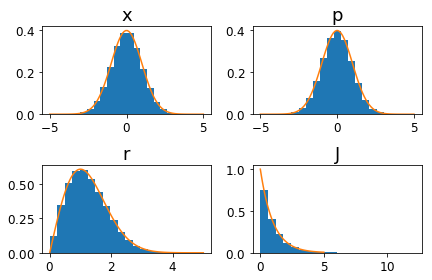

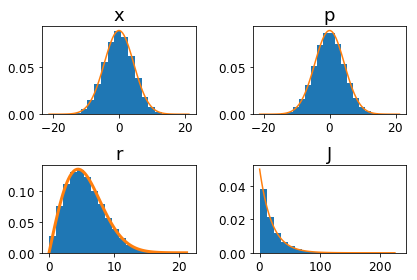

In [2]:
pi2 = 2*np.pi
bins = 20

N = int(1e5)
x = np.random.randn(N)
p = np.random.randn(N)
xax = np.linspace(-5,5,100)
xt = 1/np.sqrt(pi2)*np.exp(-0.5*xax**2)
rax = np.linspace(0,5,100)
rt = rax*np.exp(-0.5*rax**2)
plt.figure()
plt.subplot(221)
plt.hist(x,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('x')
plt.subplot(222)
plt.hist(p,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('p')

plt.subplot(223)
plt.hist(np.sqrt(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,rt)
plt.title('r')
plt.subplot(224)
plt.hist(0.5*(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,np.exp(-rax))
plt.title('J')
plt.tight_layout()

# After a time
D=1
t=10
sig = np.sqrt(2*D*t)
x = np.random.normal(0,sig,N)
p = np.random.normal(0,sig,N)
xmax = np.max(np.abs(x))
xax = np.linspace(-xmax,xmax,100)
xt = 1/np.sqrt(pi2*sig**2)*np.exp(-0.5*xax**2/sig**2)
rax = np.linspace(0,xmax,100)
rt = rax/sig**2*np.exp(-0.5*rax**2/sig**2)
plt.figure()
plt.subplot(221)
plt.hist(x,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('x')
plt.subplot(222)
plt.hist(p,normed=True,bins=bins)
plt.plot(xax,xt)
plt.title('p')

plt.subplot(223)
plt.hist(np.sqrt(x**2+p**2),normed=True,bins=bins)
plt.plot(rax,rt,lw=3)
plt.title('r')
plt.subplot(224)
plt.hist(0.5*(x**2+p**2),normed=True,bins=bins)
plt.plot(0.5*rax**2,1/sig**2*np.exp(-0.5*rax**2/sig**2))
plt.title('J')
plt.tight_layout()

<IPython.core.display.Javascript object>


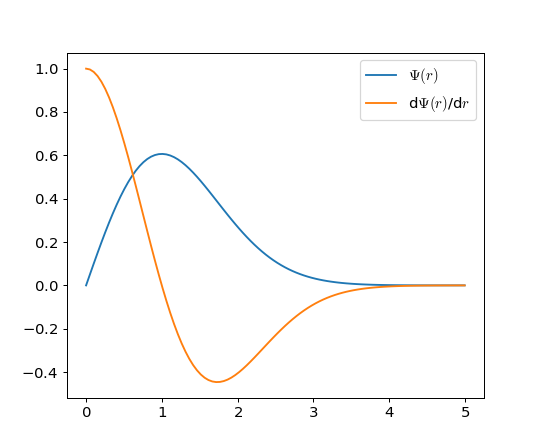

In [232]:
r = np.linspace(0,5,100)
phir = r*np.exp(-r**2/2)
dphirdr=(1-r**2)*np.exp(-r**2/2)
plt.figure()
plt.plot(r,phir,label=r'$\Psi(r)$')
plt.plot(r,dphirdr,label=r'd$\Psi(r)$/d$r$')
plt.legend(loc=0)

# From psi(r)/psi(J) to psi(x)

/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in sqrt
/home/sfuruset/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:54: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/home/sfuruset/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


<IPython.core.display.Javascript object>


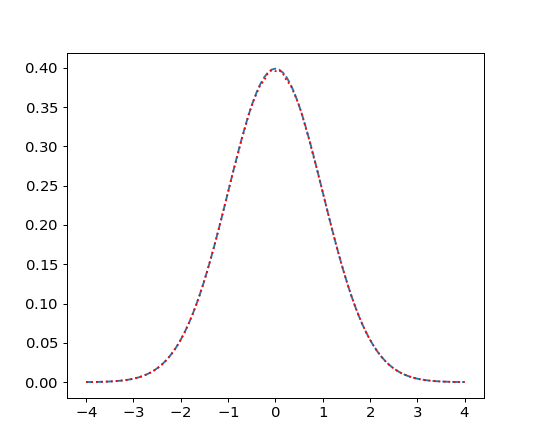

In [230]:
pi=np.pi
pi2 = np.pi*2
Nx = 101
Nr = 50
x = np.linspace(-4,4,Nx)
r = np.linspace(0,6,Nr)
rc= (r[1:]+r[:-1])/2
rs=rc
dx = np.diff(x[:2])
dr = np.diff(rs[:2])
sig0=1
if 1:
    psix0 = 1/np.sqrt(pi2*sig0**2)*np.exp(-.5*x**2/sig0**2)
    psir =1/sig0**2*np.exp(-.5*rs**2/sig0**2)
else:
    w = 3
    psir = 1/w*np.ones_like(rs)
    psir[rs>w]=0
    psix0 = np.zeros_like(x)

psix = np.zeros_like(x)
if 0:
    for i,ir in enumerate(rs):
        dist = np.zeros(Nx)
        ind = x**2<ir**2
        dist[ind] = 1/(pi*np.sqrt(ir**2-x[ind]**2))
        norm = np.sum(dist)*dx
        if norm>0: 
            dist*=1/norm

        psix += ir*psir[i]*dist *dr


    
# # Performing the integral
# func = sc.interpolate.interp1d(rs,rs*psir,kind='linear',fill_value='extrapolate')
# def integrand(r,x):
#     ind = x**2<r**2
    
#     if np.size(ind)>1:
# #         print(np.size(r),np.size(x))
#         ans = np.zeros_like(x)
#         ans[ind] = func(r)/(pi*np.sqrt(r**2-x[ind]**2))
#         return ans
#     elif ind:
#         return func(r)/(pi*np.sqrt(r**2-x**2))
#     else:
#         return 0
# psix2 = sc.integrate.quad(integrand,0,6,args=(x,))[0] 
    
func = sc.interpolate.interp1d(rs,rs*psir,kind='quadratic',bounds_error=False,fill_value='extrapolate')
def integrand(r,x):
    ind = x**2<r**2
    return [0, func(r)/(pi*np.sqrt(r**2-x**2))][ind]
    
psix2 = np.zeros_like(x)
for i,ix in enumerate(x):
    psix2[i] = sc.integrate.quad(integrand,0,5,args=(ix,))[0] 




#Plotting

plt.figure()
# plt.plot(r,psir)
# plt.plot(x,psix)
plt.plot(x,psix0,'--')
# plt.plot(rs/np.sqrt(2),np.sqrt(psir/(pi2)))
plt.plot(x,psix2,'r:')


In [220]:
sc.integrate.quad(func,0,8)[0]

/home/sfuruset/miniconda3/lib/python3.5/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


0.9999797028653531

In [159]:
np.size(1)

1

<IPython.core.display.Javascript object>


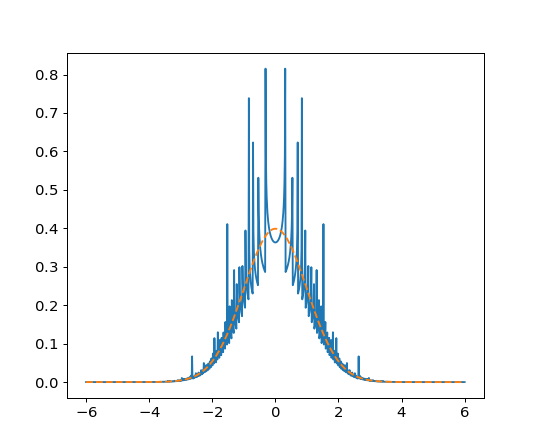

In [144]:
pi2 = np.pi*2
Nx = 1001
Nj = 1000
x = np.linspace(-6,6,Nx)
j = np.linspace(0,10,Nr)
jc= (j[1:]+j[:-1])/2
js=jc
dx = np.diff(x[:2])
dj = np.diff(js[:2])
sig0=1
if 1:
    psix0 = 1/np.sqrt(pi2*sig0)*np.exp(-.5*x**2/sig0**2)
    psij =1/sig0**2*np.exp(-js/sig0**2)
else:
    w = 3
    psir = 1/w*np.ones_like(rs)
    psir[rs>w]=0
    psix0 = np.zeros_like(x)
    
psix = np.zeros_like(x)
for i,ij in enumerate(js):
    dist = np.zeros(Nx)
    ind = x**2<ij*2
    dist[ind] = 1/(pi2*np.sqrt(2*ij-x[ind]**2))
    norm = np.sum(dist)
    if norm>0: 
        dist*=1/norm
#         print(ir)
#         print(dist)
    else: print(i,ij)
    psix += psij[i]*dist *dj/dx
    

    
plt.figure()
# plt.plot(r,psir)
plt.plot(x,psix)
plt.plot(x,psix0,'--')
# plt.plot(rs/np.sqrt(2),np.sqrt(psir/(pi2*rs)))
